In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Пустых значений нет, что хорошо

In [5]:
df.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

преобразуем пол, ланч и тест преп курс в булевый тип

In [6]:
df.gender.unique()

array(['female', 'male'], dtype=object)

In [7]:
df['gender'].replace('male',0,inplace=True)
df['gender'].replace('female',1,inplace=True)

In [8]:
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [9]:
df['test preparation course'].replace('none',0,inplace=True)
df['test preparation course'].replace('completed',1,inplace=True)

In [10]:
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [11]:
df['lunch'].replace('free/reduced',0,inplace=True)
df['lunch'].replace('standard',1,inplace=True)

In [12]:
df.describe()

,gender,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.518000,0.645000,0.358000,66.08900,69.169000,68.054000
std,0.499926,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,1.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,1.000000,1.000000,100.00000,100.000000,100.000000


Женщин чуть больше чем мужчин, к тесту готовилось 36% с помощью курса, ланч стандартный у 65%, квартили по предметам примерно одинаковые, только матем чуть хуже по всем и даже есть 0, мб не один

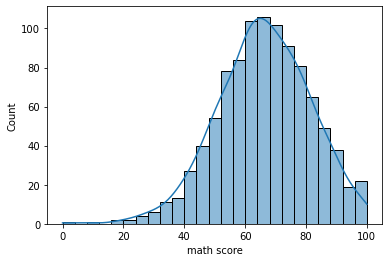

In [13]:
sns.histplot(data=df,x='math score',kde=True)
plt.show()

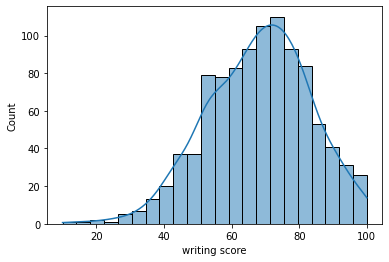

In [14]:
sns.histplot(data=df,x='writing score',kde=True)
plt.show()

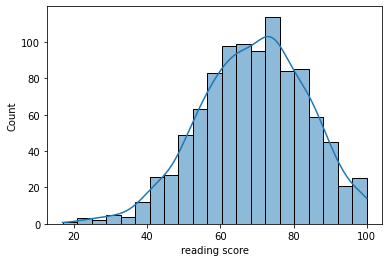

In [15]:
sns.histplot(data=df,x='reading score',kde=True)
plt.show()

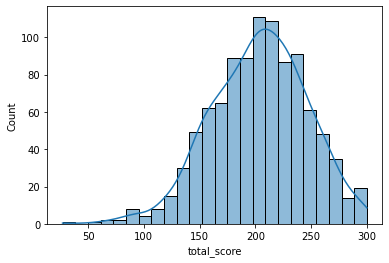

In [16]:
df['total_score'] = df['math score'] + df['reading score'] + df['writing score']

sns.histplot(df['total_score'],kde=True)
plt.show()

Распределены нормально, со смещением вправо

Посмотрим на гендерные различия с разными условиями

In [17]:
df.groupby(['gender']).agg(['min','median','max'])

lunch            test preparation course            math score         \
         min median max                     min median max        min median   
gender                                                                         
0          0      1   1                       0      0   1         27     69   
1          0      1   1                       0      0   1          0     65   

            reading score             writing score             total_score  \
        max           min median  max           min median  max         min   
gender                                                                        
0       100            23     66  100            15     64  100          69   
1       100            17     73  100            10     74  100          27   

                    
       median  max  
gender              
0         199  300  
1         211  300

Девушки слабее по математике в среднем

In [18]:
df[['lunch','gender','math score','writing score','reading score']].groupby(['lunch','gender']).agg(['min','median','max'])

math score             writing score             reading score  \
                    min median  max           min median  max           min   
lunch gender                                                                  
0     0              27     62  100            15     59   93            23   
      1               0     57   93            10     68  100            17   
1     0              30     72  100            22     67  100            26   
      1              19     67  100            30     76  100            29   

                          
             median  max  
lunch gender              
0     0        61.0  100  
      1        67.0  100  
1     0        67.5  100  
      1        75.0  100

В среднем, стандартный ланч повлиял положительно на оба пола по всем предметам

In [19]:
df[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).agg(['min','median','max'])

math score             writing score         \
                                      min median  max           min median   
test preparation course gender                                               
0                       0              27     67   97            15     60   
                        1               0     62  100            10     70   
1                       0              39     73  100            38     70   
                        1              23     67   99            36     79   

                                    reading score              
                                max           min median  max  
test preparation course gender                                 
0                       0        92            23     63   96  
                        1       100            17     71  100  
1                       0       100            37     71  100  
                        1       100            40     78  100

подготовительный курс положительно повлиял на всех

In [20]:
df[['race/ethnicity',
    'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['race/ethnicity','gender']).agg(['min','median','max'])

math score             writing score              \
                             min median  max           min median  max   
race/ethnicity gender                                                    
group A        0              28     63  100            19   60.0   92   
               1              34     57   92            41   67.0   97   
group B        0              30     65   94            15   60.0   92   
               1               8     62   97            23   71.5   96   
group C        0              27     68   98            27   62.0   95   
               1               0     63   96            10   74.0  100   
group D        0              39     71  100            34   67.0   99   
               1              26     65   98            32   76.0  100   
group E        0              30     78  100            22   70.0  100   
               1              32     71  100            38   76.0  100   

                      reading score              
                                min median  max  
race/ethnicity gender                            
group A        0                 23   61.0   96  
               1                 43   67.5  100  
group B        0                 24   62.0   96  
               1                 24   71.5   97  
group C        0                 28   66.0  100  
               1                 17   73.0  100  
group D        0                 34   68.0   97  
               1                 31   74.0  100  
group E        0                 26   73.0  100  
               1                 34   76.0  100

Самые низкие средние баллы в группе А, самые высокие в Е, но минимумы отличаются порой

Посмотрим столбцы race/ethnicity и parental

In [21]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

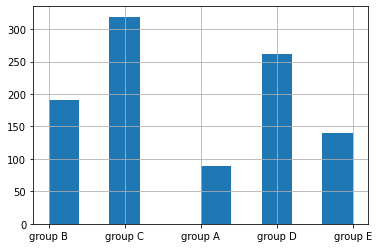

In [22]:
df['race/ethnicity'].hist()

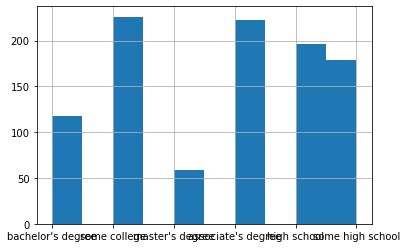

In [23]:
df['parental level of education'].hist()

c:\users\adm\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


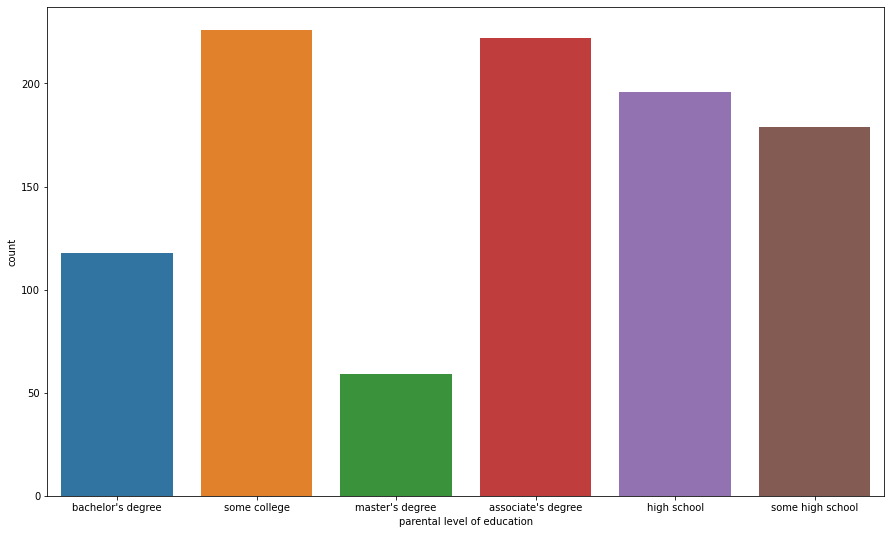

In [24]:
plt.figure(figsize=(15,9))
sns.countplot(df['parental level of education'])

Из дискуссий нашел распределения оценок:

In [25]:
# 0  - 40: E
# 41 - 60: D
# 60 - 70: C
# 70 - 80: B
# 80 - 90: A
# 90 - 100: O
def getgrade(perc):
    if(perc >= 90):
        return 'O'
    if(perc >= 80):
        return 'A'
    if(perc >= 70):
        return 'B'
    if(perc >= 60):
        return 'C'
    if(perc >= 40):
        return 'D'
    else :
        return 'E'

In [26]:
df['percentage'] = df['total_score']/3

In [27]:
df['grades'] = df.apply(lambda x: getgrade(x['percentage']), axis = 1 )

df['grades'].value_counts()

B    261
C    256
D    255
A    146
O     52
E     30
Name: grades, dtype: int64

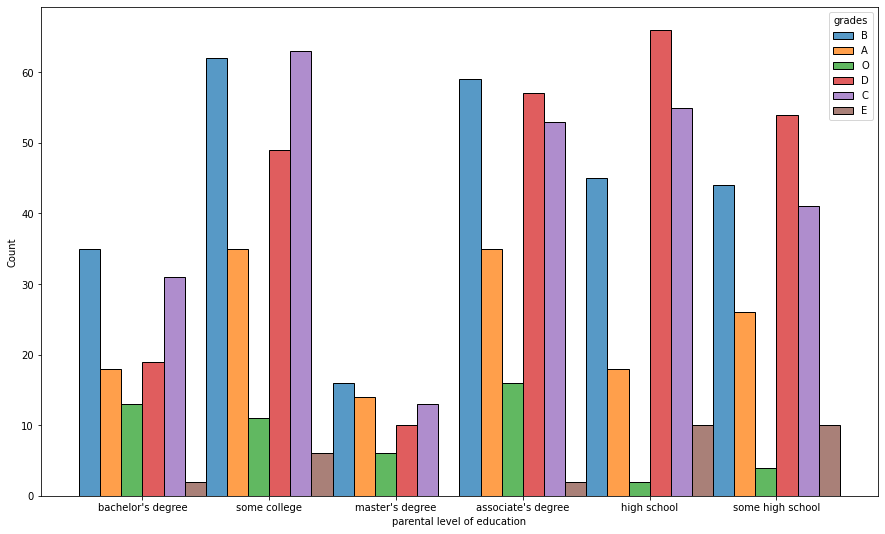

In [28]:
plt.figure(figsize=(15,9))
sns.histplot(x = 'parental level of education', data = df, hue = 'grades',multiple="dodge")

Значений мало, но видно, что у родителей с магистратурой нету детей с E, также у них больше A,B и O, чем у всех остальных. В то же время у родителей со "средним" образованием, много детей с D и E.

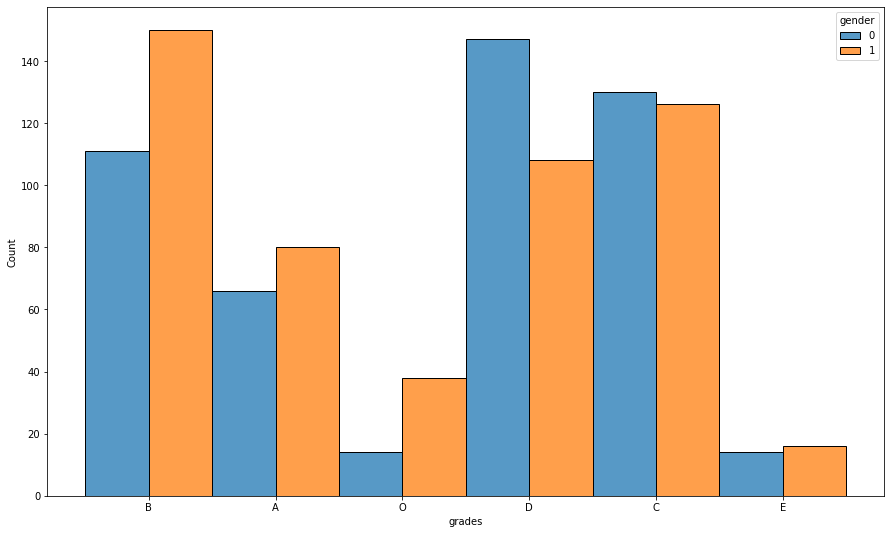

In [29]:
plt.figure(figsize=(15,9))
sns.histplot(x = 'grades', data = df, hue = 'gender',multiple="dodge")

У девочек гораздо больше A,O,B чем у мальчиков, а вот D и C наоборот.E равны.

Финальные преобразования и попробую PCA.

In [30]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [31]:
df['race/ethnicity'].replace('group A', 1,inplace=True)
df['race/ethnicity'].replace('group B', 2,inplace=True)
df['race/ethnicity'].replace('group C', 3,inplace=True)
df['race/ethnicity'].replace('group D', 4,inplace=True)
df['race/ethnicity'].replace('group E', 5,inplace=True)

In [32]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [33]:
df['parental level of education'].replace('some high school',1,inplace=True)
df['parental level of education'].replace('high school',2,inplace=True)
df['parental level of education'].replace('some college',3,inplace=True)
df['parental level of education'].replace("bachelor's degree",4,inplace=True)
df['parental level of education'].replace("master's degree",5,inplace=True)
df['parental level of education'].replace("associate's degree",6,inplace=True)

In [34]:
df.drop('percentage',inplace=True,axis=1)
df.drop('grades',inplace=True,axis=1)
df.drop('total_score',inplace=True,axis=1)
df.describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,0.518000,3.174000,3.348000,0.645000,0.358000,66.08900,69.169000,68.054000
std,0.499926,1.157179,1.773709,0.478753,0.479652,15.16308,14.600192,15.195657
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,17.000000,10.000000
25%,0.000000,2.000000,2.000000,0.000000,0.000000,57.00000,59.000000,57.750000
50%,1.000000,3.000000,3.000000,1.000000,0.000000,66.00000,70.000000,69.000000
75%,1.000000,4.000000,5.000000,1.000000,1.000000,77.00000,79.000000,79.000000
max,1.000000,5.000000,6.000000,1.000000,1.000000,100.00000,100.000000,100.000000


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   int64
 1   race/ethnicity               1000 non-null   int64
 2   parental level of education  1000 non-null   int64
 3   lunch                        1000 non-null   int64
 4   test preparation course      1000 non-null   int64
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


In [36]:
from sklearn.decomposition import PCA

In [37]:
pca = PCA(n_components = None)

In [38]:
df_pca=pd.DataFrame(pca.fit_transform(df))
df_pca.shape

(1000, 8)

In [39]:
df_pca

,0,1,2,3,4,5,6,7
0,-8.486451,1.217891,2.145378,0.310941,1.354730,-0.671184,-0.150722,-0.297239
1,-25.458633,-13.731347,-1.897683,-0.678565,0.048435,0.145876,0.612246,0.131403
2,-43.126958,-0.410129,-1.267157,1.130842,1.552808,-0.605559,-0.265209,-0.194517
3,32.025282,-0.926445,-7.818128,3.539066,1.825431,0.368626,-0.153177,0.156944
4,-14.768669,2.039961,-1.495357,-0.401900,0.272528,-0.273280,0.026606,0.559447
...,...,...,...,...,...,...,...,...
995,-45.518163,-4.301418,-2.820554,1.359426,-1.526761,0.176581,0.488041,-0.303338
996,18.222077,7.390647,1.406286,-1.151447,0.121113,0.258470,-0.691265,0.136982
997,4.771002,-5.175437,-3.778399,-1.059917,-0.173363,0.730451,-0.015229,-0.574558
998,-11.474358,-5.474304,-0.411439,-0.480414,-0.865853,0.115296,0.606746,-0.288390


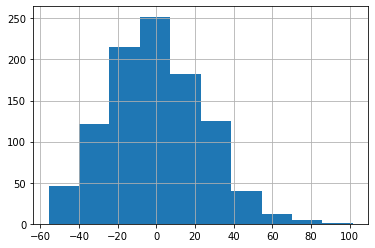

In [40]:
df_pca[0].hist()

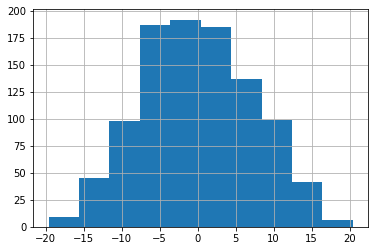

In [41]:
df_pca[1].hist()

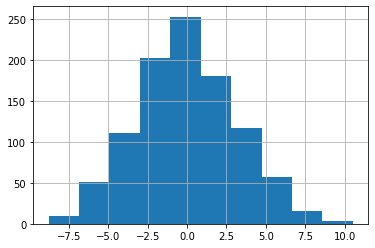

In [42]:
df_pca[2].hist()

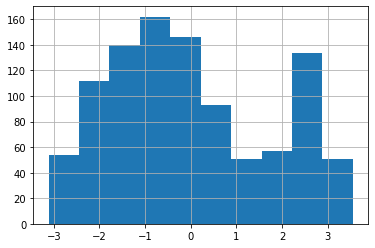

In [43]:
df_pca[3].hist()

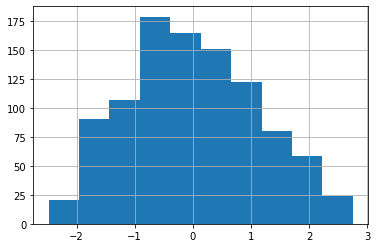

In [44]:
df_pca[4].hist()

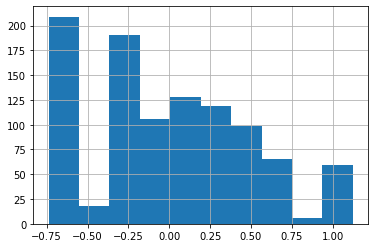

In [45]:
df_pca[5].hist()

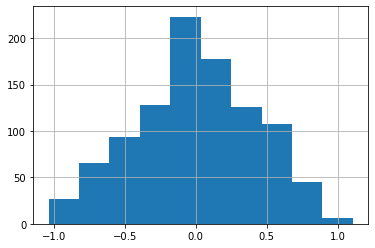

In [46]:
df_pca[6].hist()

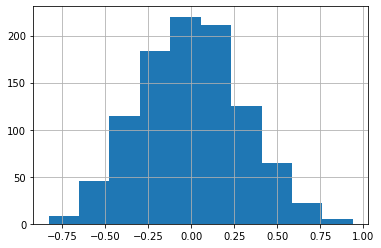

In [47]:
df_pca[7].hist()